<a href="https://colab.research.google.com/github/royam0820/HuggingFace/blob/main/HF_NLP_ch01_Hello_Transformers_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uncomment and run this cell if you're on Colab or Kaggle
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements()

Cloning into 'notebooks'...
remote: Enumerating objects: 502, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 502 (delta 98), reused 92 (delta 86), pack-reused 378
Receiving objects: 100% (502/502), 29.34 MiB | 27.71 MiB/s, done.
Resolving deltas: 100% (234/234), done.
/content/notebooks/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [ ]:
#hide
from utils import *
setup_chapter()

Using transformers v4.11.3
Using datasets v1.16.1


# Hello Transformers
In 2017, researchers at Google published a paper entitled [Attention Is all You Need](https://arxiv.org/abs/1706.03762) that proposed a novel neural network architecture for sequence modeling. It has been dubbed the Transformer architecture which outperformed the recurrent neural network architecture (RNN) on machine translation tasks, both in terms of translation quality and training cost.

In parallel, an effective transfer learning method called [ULMFIT](https://arxiv.org/abs/1801.06146) showed that training long short-term memory (LSTM) networks on a very large and diverse corpus could produce state-of-the-art text classifiers with little labeled data.

These advances were the catalysts for two of today's most well-known transformers: the [Generative Pretrained Transformer (GPT)](https://openai.com/blog/language-unsupervised/) and [Bidirection Encoder Representation from Transformers (BERT)](https://arxiv.org/abs/1810.04805). By combining the Transformer architecture with unsupervised learning, these models removed the need to train task-specific architectures from scratch and broke almost every benchmark in NLP by a signigicant margin.

Since the release of GPT and BERT,a zoo of transformer models has emerged, see the transformers timeline below.

<img alt="transformer-timeline" caption="The transformers timeline" src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_timeline.png?raw=1" id="transformer-timeline"/>

In this chapter we'll explain the core core concept of transformers which are:
- The encoder-decoder framework
- The attention mechanisms
- The transfer learning

## The Encoder-Decoder Framework
Prior to transformers, recurrent architecture such as LSTMs were the state of the art in NLP. These architectures contain a feedback loop in the network connection that allows information to propagate from one step to another, making them ideal for modeling sequential data like text. See figure below: Unrolling an RNN in time.

<img alt="rnn" caption="Unrolling an RNN in time." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_rnn.png?raw=1" id="rnn"/>

As illustrated above, an RNN receives some imput (which would be a word or character) (i.e.: Transformers are great!) feeds it through the network and outputs a vector called the *hidden state*, at the same time, the model feeds some information back to itself through the *feedback loop*, which it can then use in the next step. That is the RNN passes information about its state at each step to the next operation in sequence. This is how an RNN keep track of information from previous steps, and use it for its output predictions.

One area where RNNs played an important role was in the development of machine translation systems, where the objective is to map a sequence of words in some language to another. This kind of task is usually tackled with an *encoder-decoder* or *sequence to sequence* architecture, which is well suited for situations where the input and output are both sequences of arbitrary length. 

The job of the *encoder* is to encode the information from the input sequence into a *numerical representation* that is often called the *last hidden state*. This state is then passed to the decoder, which generates the output sequence.

In general, the encoder and decoder components can be any kind of neural network architecture that can model sequences.  See figure below: An encoder-decoder architecture with a pair of RNNs (in general, there are many more recurrent layers that those shown below) illustrating a translation task from English to German.

<img alt="enc-dec" caption="Encoder-decoder architecture with a pair of RNNs. In general, there are many more recurrent layers than those shown." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec.png?raw=1" id="enc-dec"/>

> One weakness of this architecture is that the final *hidden state* of the encoder creates an *information bottleneck*: it has to represent the meaning of the whole input sequence because this is all the decoder has access to when generating the output.  This is especially challenging for long sequences, where information at the start of the sequence might be lost in the process of compressing everything to a single, fixed representation.

> Fortunately, there is a way out of this bottleneck, by allowing the decoder to have access to all of the encoder's hidden states. The general mechanism for this is called *attention*, and is a key component in many modern neural network architectures. 

## Attention Mechanisms
The main idea behind attention is that instead of producing a single hidden state for the input sequence, the encoder outputs a hidden state at each step that the decode can access.  However, using all the states at the same time will create a huge input for the decoder, so some mechanisms is needed to prioritize which states to use. This is where attention comes in: it lets the decoder assign a different amount of weight, or *attention*, to each of the encoder states at every decoding timestep. 
See the figure below for an illustration of this process: An encoder-decoder architecture with an attention mechanism for a pair of RNNs.

<img alt="enc-dec-attn" caption="Encoder-decoder architecture with an attention mechanism for a pair of RNNs." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec-attn.png?raw=1" id="enc-dec-attn"/> 

By focusing on which input tokens are most relevant at each timestep, these attention-based models are able to learn nontrivial alignments between the words in a generated translation and those in a source sentence.
See figure below: RNN encoder-decoder alignment of words in English and the generated translation in French.

<img alt="attention-alignment" width="500" caption="RNN encoder-decoder alignment of words in English and the generated translation in French (courtesy of Dzmitry Bahdanau)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter02_attention-alignment.png?raw=1" id="attention-alignment"/> 

NB: the figure above shows the visualization of the attention weights for and English and French translation model.  It shows that the decoder is able to correctly align the words "zone" with "Area", which are ordered differently in the two languages.

Although attention enabled the production of much better translations, there is still a major shortcoming with using recurrent models for the encoder and decoder; the computations are inherently sequential and cannot be parallelized across the input sequence.

With the transformer, a new modeling paradigm was introduced: dispense with recurrence altogether, and instead rely entirely on a special form of attention called *self-attention*.  Self-attention will be covered in detail in chapter 3, but the basic idea is to allow attention to operate on all the states in the same layer of the neural network. See below for an illustration: Encoder-decoder architecture of the original transformer.

<img alt="transformer-self-attn" caption="Encoder-decoder architecture of the original Transformer." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_self-attention.png?raw=1" id="transformer-self-attn"/> 

NB: both the encoder and decoder have their own self-attention mechanisms whose outputs fed a feed-forward neural network (FF NN).  This architecture can be trained much faster than recurrent models and paved the way for many of the recent breakthroughs in NLP.

In the original Transformer paper, the translation model was trained from scratch on a large corpus of sentence pairs in various languages.  However, in many practical applications of NLP, we do not have access to a large amounts of labeled text data to train our models on. A final piece was missing to get the transformer revolution started: *transfer learning*.

## Transfer Learning in NLP
It is nowadays common practice in computer vision to use transfer learning to train a convolutional neural network *ResNet* on one task, and then adapt it to or *fine-tune it on a new task. This allows the network to make use of the knowledge learned from the original task.  Architecturally, it involves splitting the model into a *body* and a *head*, where the *head* is a task-specific network.  During training, the weights (learnable parameters of a neural network) of the body learn broad features of the source domain and these weights are used to initalize a new model for the new task. Compared to traditional supervised learning, this approach typically produces high-quality models that can be trained much more efficiently on a variety of downstream tasks, and with much less labeled data.

In computer vision, the models are first trained on large-scale datasets such as [ImageNet](https://image-net.org) which contain millions of images. This process is called *pretraining* and its purpose is to teach the models the basic feature of images, such as edges and colors. The pretrained models are then fine-tuned on a downstream task such as classifying flower species with a relatively smallnumber of labeled examples (usually a few hundred per class). Fine-tuned models typically achieve a higher accuracy than supervised models trained from scratch on the same amount of labeled data.

The figure below shows a comparison of traditional supervised learning (left) and transfer learning (right).

<img alt="transfer-learning" caption="Comparison of traditional supervised learning (left) and transfer learning (right)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_transfer-learning.png?raw=1" id="transfer-learning"/>  

In 2018, thia same pre-traiing process as use in computer vision was applied for NLP. ULMFIT introduced a general framework to adapt pretrained LSTM models for various tasks.

This framework involves three main steps (see figure below):
- **Pretraining**: The initial training objective is quite simple: predict the next word based on the previous words. This task is referred to as *language modeling*. No labeled data is required, and one can make use of abundantly available text from sources such as Wikipedia.
- **Domain adatation**: Once the language model is pretrained on a large-scale corpus, the next step is to adapt it to the in-dormain corpus (e.g.: from Wikipedia to the IMDB corpus of movie reviews. This stage still use language modeling, but now the model has to predict the next word in the target corpus.
- **Fine-tuning**: In this step, the language is fine-tuned with a classification task (sentiment analysis on movie reviews).

<img alt="ulmfit" width="500" caption="The ULMFiT process (courtesy of Jeremy Howard)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_ulmfit.png?raw=1" id="ulmfit"/>

ULMFIT provided the missing piece to make transformers take off. In 2018, two transformers were released that combined self-attention with transfer learning: GPT and BERT.

- **GPT**: uses only the decoder part of the transformer architecture, and the same language modeling approach as ULMFIT. GPT was trained on the BookCorpus which consists of 7,000 unpublished books from a variety of genres including Adventure, Fantasy and Romance.
- **BERT**: uses the encoder part of the Transformer architecture, and a special form of language modeling called *masked language modeling*. The objective of masked language modeling is to predict randomly masked words in a text. For example, give a sentence like "I looked at my `[MASK]` and saw that `[MASK]` was late." The model needs to predict the most likely candidates for the masked words that are denoted by `[MASK]`. BERT was pretrained on the BookCorpus and the English Wikipedia.

However, with different research lab releasing their models in different frameworks (Pytorch and TensorFlow), it was not always easy for NLP practitioners to port these models to their own application. With the release of the [HF Transformers](https://oreil.ly/Z79jF), a unified api across more than 50 architectures was progressively built, making it easy for NLP practitioners to integrate these models into many real-life applications today.

See the [HuggingFace Hub](https://huggingface.co/models)


## Hugging Face Transformers: Bridging the Gap
Applying a novel machine learning architecture to a new task can be a complex undertaking and usually involves the following steps:
- Implement the model architecture in code, typically based on Pytorch or TensorFlow, or JAX.
- Load the pretrained weights (if available) from a server
- Preprocess the inputs, pass them through the model, and apply some task-specific postprocessing
- Implement dataloads and define loss functions and optimizers to train the model.

## A Tour of Transformer Applications
Every NLP tasks start with a piece of text, like the following example, regarding an Amazon customer feedback.

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

Depending on your application, the text you are working on could be a legal contract, a product definition, or something else entirely. In the case of customer feedback, you would probably would like to know if the feedback is positive or negative; this task is called *sentiment analysis* and is part of a broader topic called *text classification* that we will explore in chapter 2.

### Text Classification
Let's explore sentiment analysis from a customer feedback.
HF Transformers has a layered API that allows you to interact with the library at various levels of abstraction. It abstracts all the steps needed to convert raw text into a set of predictions from a fine-tuned model.

In [ ]:
# instantiating a pipeline
from transformers import pipeline

# providing the name of task we are interested in
classifier = pipeline("text-classification")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

NB: the first time you run this code, you will see a few progress bars because the pipeline automatically downloads the model weights from the [HF Hub](https://oreil.ly/zLK11). The second time running the pipeline, the library will notice that the have already downloaded the weights and will use the cached version instead. By default the `text-classification` pipeline uses a model designed for sentiment analysis, but it also supports multiclass and multilabel classification.

In [ ]:
import pandas as pd

# generating predictions and storing them in a Pandas dataframe
outputs = classifier(text)
pd.DataFrame(outputs)    

,label,score
0,NEGATIVE,0.901546


NB: Each prediction is a Python dictionary, so we can use Pandas to display them nicely as a `DataFrame`.
The pipeline only returns one of the `POSITIVE` or `NEGATIVE` labels, since the other can be inferred by computing `1-score`.

### Named Entity Recognition
In NLP, real-world objects like products, places, and people are called *named entities*, and extracting them from text is called *named entity recognition (NER)*. 

In [ ]:
# calling the NER pipeline
ner_tagger = pipeline("ner", aggregation_strategy="simple")

# analysing the text for named entities
outputs = ner_tagger(text)
pd.DataFrame(outputs)    

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


NB: We can see that the pipeline has detected all the entities and also assigned a category such as `ORG` (organization), `LOC` (location), or `PER` (person) to each of them. We also use the `aggregation_strategy` argument to group the words according to the model's predictions.  For example, the entity `Optimus Prime` is composed of two words, but is assigned a single category: `MISC` (miscellaneous).  The scores tell us how confident the model was about the entities it identified. We can see that it was least confident about `Decepticons1` and the first occurence of `Megatrons`, both of which failed to group as a single entity.

> the hash symbols (#) in the word column are produced by the model's *tokenizer*, which splits words into atomic units called *tokens*. Tokenization will be study in chapter 2.

### Question Answering 
In Question answering, we provide the model with a passage of text called the *context*, along with a question whose answer we'd like to extract. The model then returns the span of text corresponding to the answer. See example below.

In [ ]:
# calling the question-answering pipeline
reader = pipeline("question-answering")

question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])    

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


NB: the pipeline returns a `start` and `end` integers corresponding to the character indices where the answer span was found (just like the NER tagging). There are several flavors of question answering that we will investigate in chapter 7. The question-answering above is called *extractive question answering* because the answer is extracted directly from the text.

### Summarization
The goal of text summarization is to take a long text as input and generate a short version with all the relevant facts.  This is much more complicated task than the previous ones since it requires the model to *generate* coherent text. 

In [ ]:
# calling the summarization pipeline
summarizer = pipeline("summarization")

outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


### Translation
Like summarization, translation is a task where the output consists of generated text. Example below of an English text translated in German.

In [ ]:
# calling the translation pipeline (English to German)
translator = pipeline("translation_en_to_de", 
                      model="Helsinki-NLP/opus-mt-en-de")

outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/750k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus
Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete,
entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von
Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich
hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere
einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt.
Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von
Ihnen zu hören. Aufrichtig, Bumblebee.


NB: the model produced a very good translation that correctly uses German's formal pronouns, like `Ihrem` and `Sie`.  Regarding the pipeline, we can also override the default model to pick the best one for your application. 

### Text Generation
Let's say you would like to be able to provide faster replies to customer feedback by having access to an autocomplete function.  With a text generation model you can do this. See below for an example.

In [ ]:
#hide
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results

In [ ]:
# calling the text-generation pipeline
generator = pipeline("text-generation")

response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. The order was
completely mislabeled, which is very common in our online store, but I can
appreciate it because it was my understanding from this site and our customer
service of the previous day that your order was not made correct in our mind and
that we are in a process of resolving this matter. We can assure you that your
order


NB: OK, maybe we wouldn't want to use this completion to calm Bumblebee down, but you get the general idea.

All of the models that we have used in this chapter are publicly available and already fine-tuned for the task at hand. In general, however, you'll want to fine-tune models on your own data, and in the following chapters you will learn how to do just that.

## The Hugging Face Ecosystem
The Hugging Face ecosystem consists of mainly two parts:
- a family of libraries and
- a hub as shown below (an overview of the HF ecosystem)

The libraries provide the code while the Hub provides the pretrained model weights, datasets, scripts for the evaluation metrics, and more.  In this section, we'll have a brief look at the various components.

<img alt="ecosystem" width="500" caption="An overview of the Hugging Face ecosystem of libraries and the Hub." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hf-ecosystem.png?raw=1" id="ecosystem"/>

### The Hugging Face Hub
As outlined earlier, *transfer learning* is one of the key factors driving the success of transformers because it makes it possible to reuse pretrained models for new tasks.  Consequently, it is crucial to be able to load pretrained models quickly and run experiments with them.

The HF Hub hosts over 20,000 freely available models. As shown below, the Models page shows filters on the left hand and a list of models on the right.

This makes experimenting with a wide range of models simple, and allows you to focus on the domain-specific parts of your project.

<img alt="hub-overview" width="1000" caption="The models page of the Hugging Face Hub, showing filters on the left and a list of models on the right." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-overview.png?raw=1" id="hub-overview"/> 

Below is an example of a model card from the HF Hub; the inference widget, allows you to interact with the model as is shown on the right.

<img alt="hub-model-card" width="1000" caption="A example model card from the Hugging Face Hub. The inference widget is shown on the right, where you can interact with the model." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-model-card.png?raw=1" id="hub-model-card"/> 

> [Pytorch](https://oreil.ly/AyTYC) and [TensorFlow](https://oreil.ly/JOKgq) also offer hubs of their own and are worth checking out if a particular model or dataset is not available on the HF hub.  

### Hugging Face Tokenizers
Behind each of the pipeline examples that we have seen in this chapter is a tokenization step that splits the raw text into smaller pieces called *tokens*. We will see how it works in chapter 2, but for now it's enough to understand that tokens may be words, parts of words, or just characters like punctuation.  Transformer models are trained on numerical representations of these tokens, so getting this step right is pretty important for the whole NLP project!

[HF Tokenizers](https://oreil.ly/Z79jF) provides many tokenization strategies and is extremely fast at tokenizing text thanks to its Rust backend (a high-performance programming language). It also takes care of all the pre- and postprocessing steps, such as normalizing the inputs and transforming the model outputs to the required format. 

With HF Tokenizers, we can load a tokenizer in the same way we can load pretrained model weights with HF Transformers. We need a dataset and metrics to train and evaluate models, so let's take a look at HF Datasets which is in charge of that aspect.

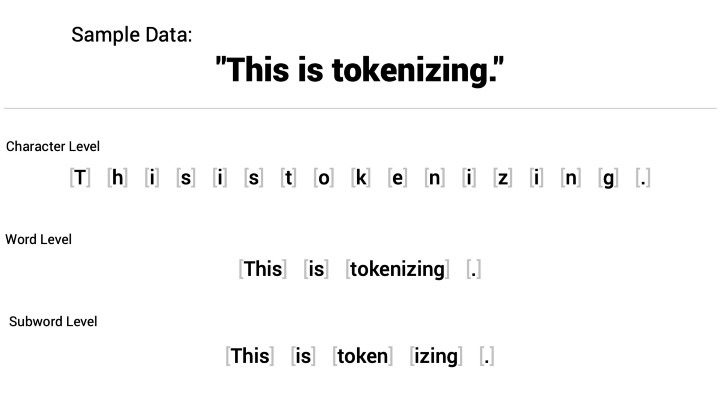

### Hugging Face Datasets
[HF Datasets](https://oreil.ly/959YT) provides a standard interface for thousands of datasets that can be found on the [HF Hub](https://oreil.ly/Rdhcu). It also provides smart caching (so you don't have to redo your preprocessing each time you run your code), and avoids RAM limitations by leveraging a special mechanism called *memory mapping* that stores the contents of a file in virtual memory and enable multiple processes to modify a file more efficiently. The library is also interoperable with popular frameworks like Pandas and NumPy, so you don't have to leave the comfort of your favorite data wrangling tools.

> Memory-mapping is a mechanism that maps a portion of a file, or an entire file, on disk to a chunck of virtual memory. The application can then access files on disk in the same way it accesses dynamic memory. This makes file reads and writes faster in comparison with using functions such as `fread` and `fwrite`.

Having a good dataset and powerful model is worthless if you can't reliably measure the performance. Unfortunately, classic NLP metrics come with many different implementations that can vary slightly and lead to deceptive results. By providing the scripts for many metrics, HF Datasets helps make experiment more reproducible and the results more trustworthy.

With the [HF Transformers](https://huggingface.co/docs/transformers/index), [HF Tokenizers](https://huggingface.co/docs/tokenizers/index)
, [HF Datasets](https://huggingface.co/datasets) libraries we have every thing we need to train our very own transformer models! However, we will see in chapter 10 that there are situations where we need fine-grained control over the training loop. That's where the last library of the ecosystem comes into play: [HF Accelerate](https://github.com/huggingface/accelerate).

### Hugging Face Accelerate
If you've ever had to write your own training script in Pytorch, chances are that you've had some headaches when trying to port the code that runs on your laptop to the code that runs on your organization's cluster. [HF Accelerate](https://oreil.ly/iRfDe) adds a layer of abstraction to your normal training loops that takes care of all the custom logic necessary for the training infrastructure.  This literally accelerates your workflow by simplifying the change of infrastructure when necessary.

## Main Challenges with Transformers
Below are a few challenges associated with Transformers that we will explore through this book:
- **Language**: NLP research is dominated by the English language. There are several models for other languages, but it is harder to find pretrained models for rare or low resource languages. In chapter 4, we'll explore multilingual transformers and their ability to perform zero-shot cross lingual transfer.
- **Data availability**: Although we can use transfer learning to dramatically reduce the amount of labeled training data our models need, it is still a lot compared to how much a human needs to perform task.  Tackling scenarios where you have little to no labeled data is the subject of chapter 9.
- **Working with long documents**: Self-attention works extremely well on paragraph-long texts, but it becomes very expensive when we move to longer texts like whole documents.  Approaches to mitigate this are discussed in chapter 11.
- **Opacity**: As with other deep learning models, transformers are to a large extent opaque. It is hard or impossible to unravel "why" a model made a certain prediction.  This is an especially hard challenge when these models are deployed to make critical decisions. We'll explore some ways to probe the errors of transformer models in chapter 2 and 4.
- **Bias**: Transformer models are predominantly pretrained on text data from the internet. This imprints all the biases that are present in the data into the models.  Making sure that these are neither racist, sexist, or worse is a challenging task. We discuss some of these issues in more detail in chapter 10.

Although daunting, many of these challenges can be overcome. As well as in the specific chapters mentioned, we will touch on these topics in almost every chapter ahead.

## Conclusion
You have seen in this chapter that with just a few lines of code you can use state-of-the-art models for classification, named entity recognition, question answering, summarization, translation and text generation; but this is just the "tip of the iceberg."!

In the following chapters, you will learn how to adapt transformers to a wide range of use cases, such as building a text classifier, or a lightweight model for production, or even training a language model from scratch. We'll be taking hands-on approach, which means that for every concept covered here, there will be accompanying code that you can use on Google Colab or your own GPU machine.

Next lesson will be on Text Classification, chapter 2 of the book. 




# Ressources
- Book: [Natural Language Processing with Transformers - Builing Language Applications with Hugging Face](https://www.amazon.fr/Natural-Language-Processing-Transformers-Applications/dp/1098136799/ref=asc_df_1098136799/?tag=googshopfr-21&linkCode=df0&hvadid=454769411026&hvpos=&hvnetw=g&hvrand=12883883338142938207&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9056140&hvtargid=pla-1661870850926&psc=1)

- Andrew Karpathy's blog post: [The Unereasonable Effectiveness of Recurrent Neural Networks](https://oreil.ly/Q55o0)